## Classification Problem - Breast Cancer Classification

[Article Link](https://blogs.oracle.com/ai-and-datascience/post/a-simple-guide-to-building-a-confusion-matrix#:~:text=The%20confusion%20matrix%20is%20represented%20by%20a%20positive,other%20hand%2C%20represents%20normality%20or%20a%20normal%20behavior.)

[Data Source](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/)

**Attributes in the data set:**

- Sample code number: id number
- Clump Thickness: 1 - 10
- Uniformity of Cell Size: 1 - 10
- Uniformity of Cell Shape: 1 - 10
- Marginal Adhesion: 1 - 10
- Single Epithelial Cell Size: 1 - 10
- Bare Nuclei: 1 - 10
- Bland Chromatin: 1 - 10
- Normal Nucleoli: 1 - 10
- Mitoses: 1 - 10
- *Class*: (2 for benign, 4 for malignant) – Binary classifier.

---

In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

os.chdir("/arifin.othman/learning_python/Breast Cancer - EDA")
file_name = "./Wisconsin_unformatted-data"


In [5]:
file_header = ["id", "class", "clump_thickness", "cell_size_uniformity", 
               "cell_shape_uniformity", "marginal_adhesion", 
               "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin", 
               "normal_nucleoli", "mitoses"]

In [6]:
data = pd.read_csv(file_name, names = file_header, 
                   skiprows = 16, skipfooter = 2, skip_blank_lines = True)

C:\Users\arifin.othman\AppData\Local\Temp\ipykernel_33044\3572045318.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_name, names = file_header,


In [7]:
data.head()

,id,class,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,1000025,2,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,1002945,2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,1015425,2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,1016277,2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,1017023,2,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1


In [8]:
data.tail()

,id,class,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
704,776715,2,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1
705,841769,2,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1
706,888820,4,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2
707,897471,4,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1
708,897471,4,4.0,8.0,8.0,5.0,4.0,5.0,10.0,4.0,1


In [9]:
data.shape

(709, 11)

In [10]:
data.isna().sum()

id                             0
class                          7
clump_thickness                7
cell_size_uniformity           8
cell_shape_uniformity          8
marginal_adhesion              8
single_epithelial_cell_size    8
bare_nuclei                    8
bland_chromatin                8
normal_nucleoli                8
mitoses                        8
dtype: int64

In [11]:
data.isnull().values.all()

False

In [12]:
data[data['mitoses'].isnull()]

,id,class,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
367,##### Group 2 : 70 points: 57B 13M (October 1989),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
438,##### Group 3 : 31 points: 22B 9M (February 1990),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
470,##### Group 4 : 17 points: 14B 3M (April 1990),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
488,##### Group 5 : 48 points: 36B 12M (August 1990),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
537,##### Group 6: 49 Points: 40B 9M (December 7,1990; Updated Jan 8,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
538,##### by dropping 2 unsatisfactorily measure...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
590,##### Group 7: 31 Points: 16B 15M (June 1991),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
622,##### Group 8: 86 Points: 72B 14M (November ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [13]:
data.drop(data[data.iloc[:,10].isnull()].index.values, inplace = True)

In [14]:
data.shape

(701, 11)

In [15]:
data[data['id'].str.len() > 8].index.values

array([539, 540], dtype=int64)

In [16]:
data.drop(data[data['id'].str.len() > 8].index.values, inplace = True)

In [17]:
data.shape

(699, 11)

In [18]:
data.to_csv("./cleaned_Wisconsin_formatted_data.csv")

In [36]:
data.dtypes

id                              object
class                           object
clump_thickness                float64
cell_size_uniformity           float64
cell_shape_uniformity          float64
marginal_adhesion              float64
single_epithelial_cell_size    float64
bare_nuclei                    float64
bland_chromatin                float64
normal_nucleoli                float64
mitoses                          int64
dtype: object

In [33]:
data['mitoses'] = data['mitoses'].astype(np.int64)

In [39]:
float64_columns = data.select_dtypes(include = 'float64').columns
float64_columns

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli'],
      dtype='object')

In [41]:
data[float64_columns] = data[float64_columns].astype(np.int64)

In [42]:
data.dtypes

id                             object
class                          object
clump_thickness                 int64
cell_size_uniformity            int64
cell_shape_uniformity           int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                     int64
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
dtype: object

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
cell_size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
cell_shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.463519,3.640708,0.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [49]:
data.groupby(['class'], as_index=False)['id'].agg('count')

,class,id
0,2,458
1,4,241


### Notes

The above table shows that 458 patients had been diagnosed as having benign cancer, while 241 are diagnosed with malignant cancer. 

In [59]:
int64_columns = data.select_dtypes(include = 'int').columns
int64_columns

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object')

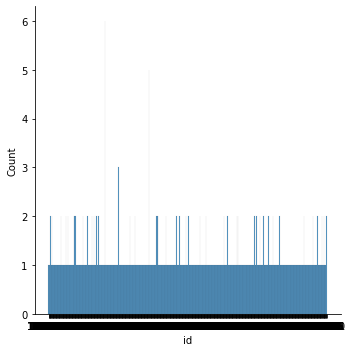

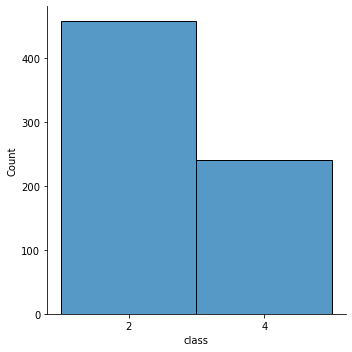

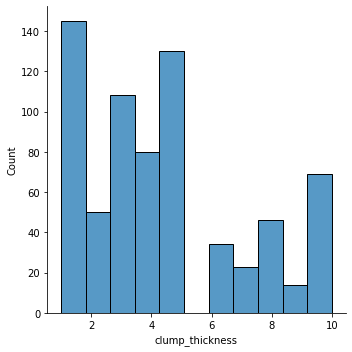

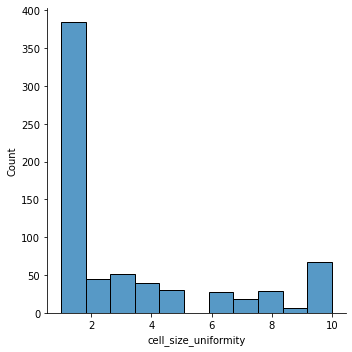

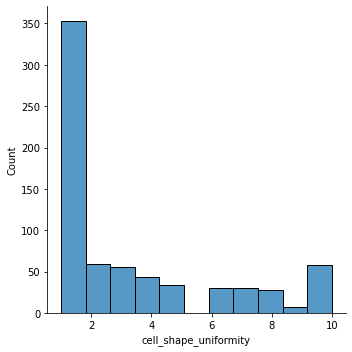

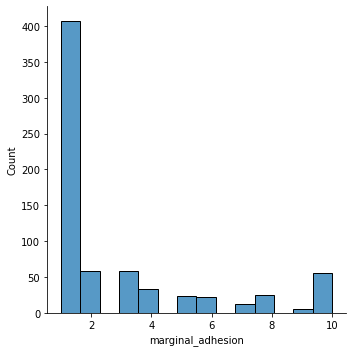

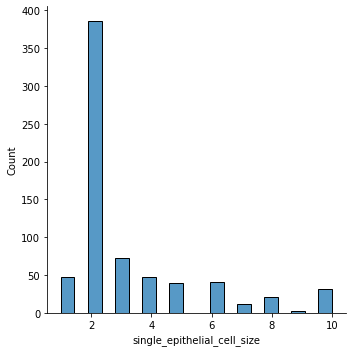

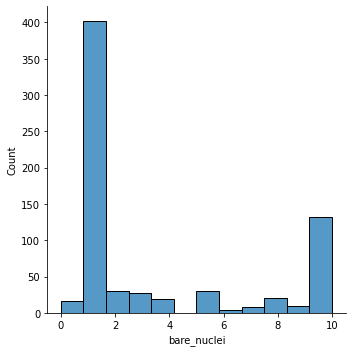

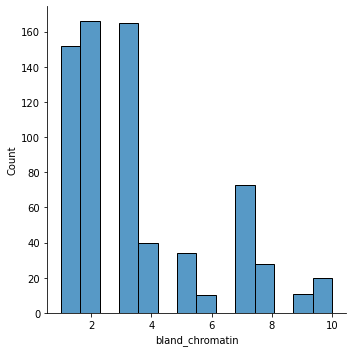

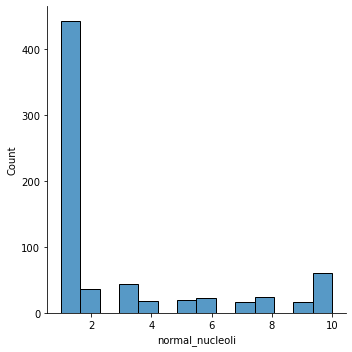

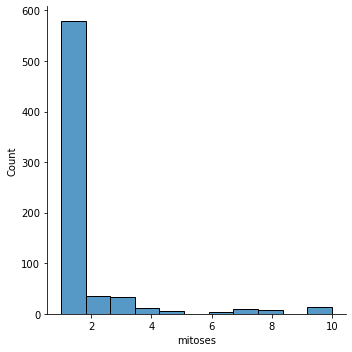

In [60]:
for column in data:
    sns.displot(x = column, data = data)